# 作業
- 作業目標 : 用 iris (dataset.load_iris()) 資料嘗試跑 hierarchical clustering

In [54]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


載入 相關套件 並 執行 hierarchical clustering 實驗 ...

score:0.5543236611296414
accuracy:0.23333333333333334
score:0.5541608580282844
accuracy:0.24
score:0.5135953221192208
accuracy:0.006666666666666667


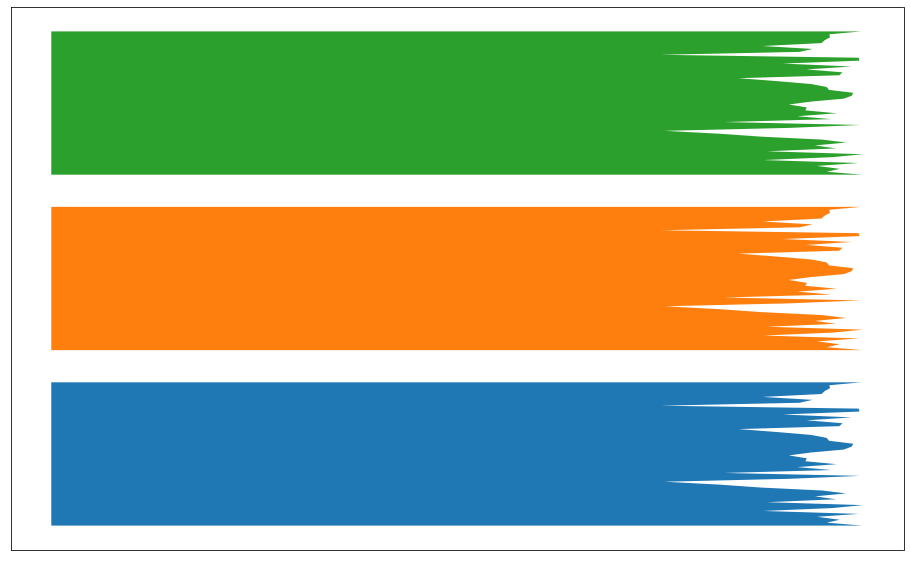

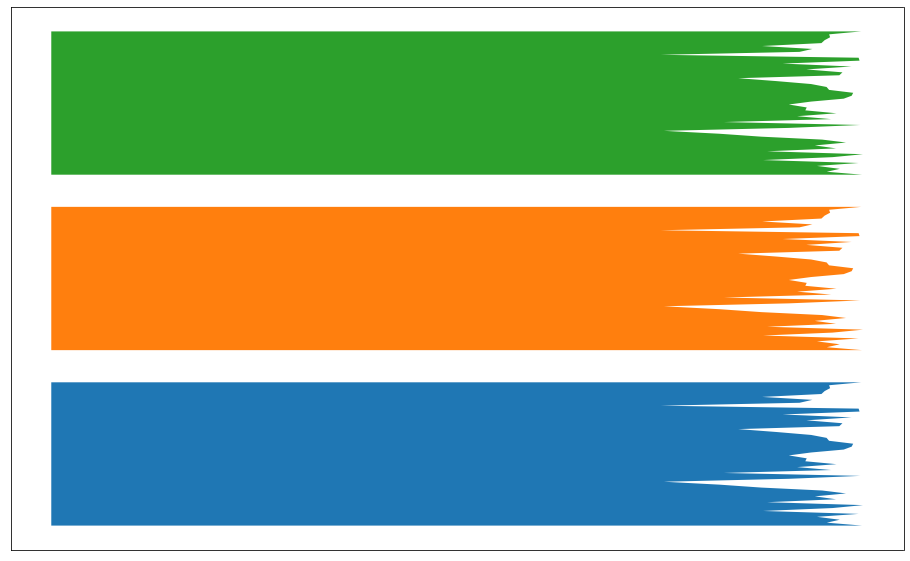

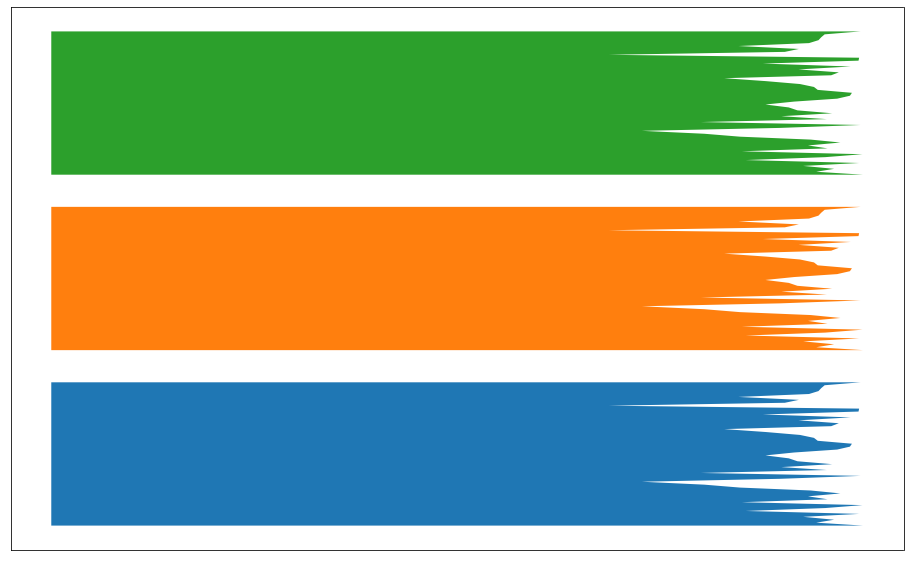

In [55]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples,silhouette_score,accuracy_score
import matplotlib.pyplot as plt
import numpy as np

clustering_list = [('Ward',AgglomerativeClustering(n_clusters = 3,linkage = 'ward')),
                  ('Average',AgglomerativeClustering(n_clusters = 3,linkage = 'average')),
                  ('Complete',AgglomerativeClustering(n_clusters = 3 , linkage = 'complete'))]

for name,estimator in clustering_list:
    estimator.fit(X)
    labels = estimator.labels_
    
    fig,(ax1) = plt.subplots(1,1)
    fig.set_size_inches(16,10)
    y_lower = 10
    cluster_score = silhouette_samples(X,labels)
    print(f"score:{silhouette_score(X,labels)}")
    print(f"accuracy:{accuracy_score(labels,y)}")
    for i in range(3):
        ith_cluster_score = cluster_score[labels == 1]
        y_upper = y_lower + ith_cluster_score.shape[0]
        
        ax1.fill_betweenx(np.arange(y_lower,y_upper),
                        0,ith_cluster_score)
        ax1.set_xticks([])
        ax1.set_yticks([])
        
        y_lower = y_upper + 10
        
    
    